Cheatcodes/ Revision

# the basic pseudocode-

1. take input, randomly generate weight or use more sophiticated way
2. get true prediction by doing dot product of weights and input
3. calculate error (squarred error or other ways)
4. calculate delta
5. after calculating delta , we have to find node delta to update weight in backpropagation
6. We will multiply delta with inputs to find update weight_delta which is the concept of gradient descent
delta = ygoal - ytrue
weight -= alpha * (delta * input)

for 2 layer neural network we learnt it





few observations from the last class
1. gradient descent - This allows us to calculate both the direction and amount that we whsould change our weight so that we
reduce error. 

direction_and_amount = (pred- goal_pred) * input

2. direction_and_amount -  it represents how we want to change our weights. pred- goa_pred is called pure error. This number 
reprents the raw direction and amount we missed. multiplication by the input which performs scaling , negative_reversal and
stopping..modifying the pure error so that its ready to update our weight

3. stopping - if our input is 0, then it will force our direction_and_amount to also be 0

4. negative reversal - well multiplying our pure error by our input will reverse the sign of your direction_and_even in the 
even that our input is negarive. This is "negative reversal" , ensuring that our weight moves in the correct direction,
even if the input is negative

5. scaling - if our input is big, our weight update should also be big. we can control this by using alpha

In [2]:
import numpy as np

In [3]:
# weights are like knowledge
np.random.seed(1)

def relu(x):
    return (x > 0) * x # returns x if x > 0
                       # return 0 otherwise

def relu2deriv(output):
    return output>0 # returns 1 for input > 0
                    # return 0 otherwise

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T
    
alpha = 0.2
hidden_size = 4

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

for iteration in range(60):
   layer_2_error = 0
   for i in range(len(streetlights)):
      layer_0 = streetlights[i:i+1]
      layer_1 = relu(np.dot(layer_0,weights_0_1))
      layer_2 = np.dot(layer_1,weights_1_2)

      layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

      layer_2_delta = (layer_2 - walk_vs_stop[i:i+1])
      layer_1_delta=layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)

      weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
      weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)

   if(iteration % 10 == 9):
      print("Error:" + str(layer_2_error))

Error:0.6342311598444467
Error:0.35838407676317513
Error:0.0830183113303298
Error:0.006467054957103705
Error:0.0003292669000750734
Error:1.5055622665134859e-05


MNIST DATA
----------

1. The MNIST problem is a dataset
developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models 
on the handwritten digit classification problem

2. The dataset was constructed from a number of scanned document dataset available from the National
Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the
Modified NIST or MNIST datasets

3. Images of digits were taken from a variety of scanned documents, normalized in size and centered. 
This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning 
with very little data cleaning or preparation required

4. Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate
and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

5. It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict.

6.  The dataset contains one label for each image, specifying the digit we are seeing in each image. We say that there are 10 classes, since we have 10 labels.




In [28]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

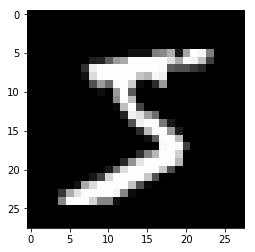

In [10]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

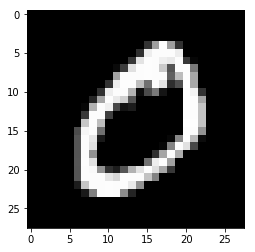

In [11]:
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train[1].shape

(28, 28)

In [15]:
x_train.shape[0]

60000

In [16]:
x_train.shape[1]

28

In [17]:
x_train.shape[2]

28

In [19]:
images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])
print(images.shape)
print(labels.shape)

(1000, 784)
(1000,)


Input layer: In this layer, we input our dataset, consisting of 28x28 images. We flatten these images into one array with 
28
×
28
=
784
 elements. This means our input layer will have 784 nodes



In [20]:
images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
# creating one hot encoding
one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

In [22]:
test_images = x_test.reshape(len(x_test),28*28) / 255
print(test_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255


In [24]:
import sys

In [25]:





test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1
    
np.random.seed(1)
relu = lambda x:(x>=0) * x # returns x if x > 0, return 0 otherwise
relu2deriv = lambda x: x>=0 # returns 1 for input > 0, return 0 otherwise
alpha, iterations, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1


for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(labels[i:i+1]))

        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)\
                                    * relu2deriv(layer_1)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r I:"+str(j)+ \
                     " Train-Err:" + str(error/float(len(images)))[0:5] +\
                     " Train-Acc:" + str(np.round(correct_cnt/float(len(images)))))

 I:349 Train-Err:0.108 Train-Acc:1.0

Now we are going to train 100 training examples at a time averaging the weight updates between all 100 examples. As it turns out, individual training examples are very noisy in terms of the weight updates tehy generate. Thus averaging them makes for a smoother learning process

In [26]:
np.random.seed(1)

def relu(x):
    return (x >= 0) * x # returns x if x > 0

def relu2deriv(output):
    return output >= 0 # returns 1 for input > 0

batch_size = 100
alpha, iterations = (0.001, 300)
pixels_per_image, num_labels, hidden_size = (784, 10, 100)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))

        layer_0 = images[batch_start:batch_end]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2,size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[batch_start:batch_end] - layer_2) ** 2)
        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))

            layer_2_delta = (labels[batch_start:batch_end]-layer_2)/batch_size
            layer_1_delta = layer_2_delta.dot(weights_1_2.T)* relu2deriv(layer_1)
            layer_1_delta *= dropout_mask

            weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
            weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    if(j%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

        sys.stdout.write("\n" + \
                         "I:" + str(j) + \
                         " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                         " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                         " Train-Acc:" + str(correct_cnt/ float(len(images))))


I:0 Test-Err:0.815 Test-Acc:0.3832 Train-Err:1.284 Train-Acc:0.165
I:10 Test-Err:0.568 Test-Acc:0.7173 Train-Err:0.591 Train-Acc:0.672
I:20 Test-Err:0.510 Test-Acc:0.7571 Train-Err:0.532 Train-Acc:0.729
I:30 Test-Err:0.485 Test-Acc:0.7793 Train-Err:0.498 Train-Acc:0.754
I:40 Test-Err:0.468 Test-Acc:0.7877 Train-Err:0.489 Train-Acc:0.749
I:50 Test-Err:0.458 Test-Acc:0.793 Train-Err:0.468 Train-Acc:0.775
I:60 Test-Err:0.452 Test-Acc:0.7995 Train-Err:0.452 Train-Acc:0.799
I:70 Test-Err:0.446 Test-Acc:0.803 Train-Err:0.453 Train-Acc:0.792
I:80 Test-Err:0.451 Test-Acc:0.7968 Train-Err:0.457 Train-Acc:0.786
I:90 Test-Err:0.447 Test-Acc:0.795 Train-Err:0.454 Train-Acc:0.799
I:100 Test-Err:0.448 Test-Acc:0.793 Train-Err:0.447 Train-Acc:0.796
I:110 Test-Err:0.441 Test-Acc:0.7943 Train-Err:0.426 Train-Acc:0.816
I:120 Test-Err:0.442 Test-Acc:0.7966 Train-Err:0.431 Train-Acc:0.813
I:130 Test-Err:0.441 Test-Acc:0.7906 Train-Err:0.434 Train-Acc:0.816
I:140 Test-Err:0.447 Test-Acc:0.7874 Train-Err:0